<a href="https://colab.research.google.com/github/fernandotoscano/BIOINFORMATICS_DRUG_DISCOVERY/blob/main/C%C3%B3pia_de_CDD_ML_Part_2_Exploratory_Data_Analysis_colab_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


**WE WANT TO RUN THE CODE CELL FOR INSTALLING CONDA AND "RDKIT" AND SO WHAT "RDKIT" ESSENTIALLY WILL ALLOW US TO DO IS, IT WILL ALLOW US TO COMPUTE THE MOLECULAR DESCRIPTORS (Molecular descriptors can be defined as mathematical representations of molecules' properties that are generated by algorithms. The numerical values of molecular descriptors are used to quantitatively describe the physical and chemical information of the molecules.) FOR THE COMPOUNDS IN THE DATASET THAT WE HAVE COMPILED FROM PART_1, SO LET'S EXPLAIN AGAIN. IN PART_1 WE HAVE ALREADY DOWNLOADED THE DATASET OF THE BIOLOGICAL ACTIVITY FROM THE CHEMBL DATABASE AND SO THE DATA SET WILL COMPRISE OF THE MOLECULE NAME,  AND THE CORRESPONDING SMILES NOTATION WHICH IS THE INFORMATION ABOUT THE CHEMICAL STRUCTURE WHICH WE WILL USE IN THE PART_2, IN ORDER TO COMPUTE THE MOLECULAR DESCRIPTORS, AND THE DATA FROM PART_1 ALSO CONTAINS THE "IC50" WHICH IN PART_1, WE HAVE ALREADY PEFORMED THE BINNING INTO THE BIOACTIVITY CLASS ACTIVE, INACTIVE AND INTERMEDIATE. AND SO IN THIS PART_2 WE'RE GOING TO SELECT ONLY 2 BY ACTIVITY CLASS WHICH ARE THE ACTIVE AND INACTIVE, SO THAT WE CAN EASILY COMPARE BETWEEN THE ACTIVE COMPOUNDS AND THE INACTIVE COMPOUNDS. sO WITHOUT FURTHER DO, LET'S LOOK AT THE CODE SO NOW CONDA AND RDKIT HAS ALREADY BEEN INSTALLED (IN THE NEXT STEP, WHICH IS NOT LIKE WE HAVE IN THIS VIDEO [33:51]).
**

## **Install conda and rdkit**

In [41]:

! pip install rdkit-pypi

In [42]:
!cat  /etc/lsb-release


DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"


In [43]:
#import sys
#print(sys.path)

In [44]:
import rdkit
#from rdkit import Chem
from IPython import display
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display

In [45]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/usr/local/lib/python3.11/dist-packages/setuptools/_vendor', '/root/.ipython']


## **Load bioactivity data**

**Now let's load up the pandas library, and make sure to click on the file on the left hand panlel and then we want to upload and then choose the bioactivity data that we have prepared (bioactivity_data_preprocessed.csv) from the previous part_1. And now let's load up the the csv file.**

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')
df


# TENTAR REMOVER CELULAS EM BRANCO.
# Delete all rows with an empty cell anywhere in the table at once in pandas.
# 1st replace to "nan" (or "NAN")
#df = df_final.replace(r'^\s*$', np.nan, regex=True)
# 2nd elimite the rows with "nan"
#df = df.dropna()
# 3rd to see:
# df


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,inactive
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,NaN
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,NaN
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,NaN
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

**In this block of code we're going to compute the "Lipinski rule of 5 Descriptors" or simply "Lipinski Descriptors", we might be wondering what is Likpinski Descriptors? Well, Lipinski Descriptor, originates from the fact that Christopher Lipinski who is a scientist at Pfizer, came up with a setg of rules, called the "Rule of 5", which was used to evaluate the drug likeness of compounds and so the drug likeness is based on the key pharmocokinetic properties comprising of  Absorption, Distribution, Metabolism and Excretion, which has an acronym of "ADME", and this is also known has Phrarmacokinetic profiles and so, what essentially "ADME" will tell us is thjat it will tell us the relative drug likeness of the compound whether it can absorbed into the body, distributed to the proper tissue and organs , and become metabolized and eventually become excreted from the body and so in order to derive the "Rule of 5", Christopher Lipinski .colected a set of FDA approved drug that are normally administered orally and then based on his analysis he oberved that the 4 descriptors that was used for his analysis had corresponding values in multiples of 5, as follows so the molecular weightshould be less then 500 Dalton, the octanol water partition coefficient or "Log P" has to be less than 5 hydrogen bond donors is less then 5, hydrogen bond acceptors is less than 10 and so, as we can see all the values are multiples of 5. And so let's proceed with computing the descriptors. So now let's load up the library: [36:09]**                    

### **Import libraries**

In [48]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

**And now let's compute the descriptors so is a custom function that was inspired from the link bellow, and it was modified to include the descriptors for this analysis. So we have the Lipinski descriptors and in this data frame and in order to get that, we're going to apply the costum function called Lipinski, which was the costum function her which takes in as input the smiles notation (def lipinski(smiles, verbose=False):), so the smoiles notation contains the chemical information and so what the chemical information tells us is the exact atomic details of the molecule and so it's gonna use that as the input to compute the molecular descriptors. And so, let's continue, and let's run the next block of code:**

In [49]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [50]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined. So we can see that there are 4 descriptors that we have previously covered including the Molecular Weight ("MW") which tell us the size, "LogP"which will tell us the solubility, and the relative number of hydrogen bond donors (NumHDonors) and acceptors (NumHAcceptors), and so we can see that there are a total of 245 rows and 4 columns:

In [51]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
240,328.466,3.34562,1.0,5.0
241,222.379,-1.99300,1.0,3.0
242,485.559,0.54470,5.0,7.0
243,222.379,-1.99300,1.0,3.0


In [52]:
# And as a recall the data frame that we have read directly from the curated file from part_1 is shown in the bellow "df" data frame:
#df_1_1 = df_final.replace(r'^\s*$', np.nan, regex=True)
#df_1_1 = df.dropna()
#df_1_1

df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,inactive
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,NaN
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,NaN
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,NaN
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN


 And so, we're going to combine the df data frame and Lipinski data frame together because we  want to have the standard value and the bioactivity class columns . And so we're going to use the "pd.concat()" function in order to combine the "df" and "df_lipinski" data frame and then we're going to put into the "df_combined" variable and then let's have a look at the new data frame (which is "df_combined"):

In [53]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [54]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,inactive,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,inactive,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,active,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,active,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,inactive,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,NaN,328.466,3.34562,1.0,5.0
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,NaN,222.379,-1.99300,1.0,3.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,NaN,485.559,0.54470,5.0,7.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN,222.379,-1.99300,1.0,3.0


So we can see that the last 4 columns are integrated into the df data frame here, and so the dimensions of the data fra,e is correct with 245 rows and then the number of columns has been expanded to be 8. And in the next step, we're going to convert the standard value which is the "IC50" to "pIC50" scale: [38:11]   

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

The reason that we convert "IC50" to "pIC50" scale transformation, which is essentially the negative logarithmic transformation from "IC50" value is that the original "IC50" value has uneven (desigual) distribution of the data points and so in order to make the distribution more even (uniforme), we will have to apply negative logarithmic distribution.

[ And so let us give take a challenge!! Let us know how the distribution of the original "IC50" looks like versus the "pIC50" that we have perfcormed the transformation so let us see in the comments of the video, after we have tried this.
And so a hint is that what we can do is perform a simple scatter plot.
And so let us know in the comments if we see any difference in the distribution of "IC50" versus the "pIC50" ]

Now, let's do the actual transformation. By running this costum function


In [55]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

One point here which is worthy to note is the "IC50" value which is contained inside the standard value column has large numbers here (below) will after performing negative logarithm, it will become a negative value and in order to prevent that we're going to need to cap the maximum value right here (-np.log10( (10**-9)* 100000000 )), so we need to cap the value to be 100 milliion so that the resulting "pIC50" would not be less than 1.0  otherwise it will have negative values (because if "log x" when, 0<x<1, "log x" will be negative), and that will make interpretation a bit more difficult.

In [56]:
df_combined.standard_value.describe()

,standard_value
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [57]:
-np.log10( (10**-9)* 100000000 )

1.0

In [58]:
-np.log10( (10**-9)* 10000000000 )

-1.0

So we're gonna cap the values to a hundred million by creating a costum function called "norm_value", and so what essentially the "norm_value" function would do, is that it will read through the individual values in the standard_value column and if the value is greater than 100 million it will cap the value to be 100 million, so that the value will not exceed  100 million, and so therefore after performing negative logarithmic transformation it will not be less than 1.0. So let's perform the "norm_value"

In [59]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

So let's perform the norm value here,  

In [60]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,2000.00
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,165.00
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,161.00
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,165.96


So let's describe the value again:  

In [61]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


And as we can see the maximum value (above) is 2.0 x 10^6, so it is a hundred million whereas previously the value is rather big (**MUST SEE THE VIDEO EXAMPLES**):


# **[This only happens in the video exercise, that's why we need to review this exercise, because we have a lot more compounds and this only works in the given exercise in the vide. The present exercise only works has a model to the next works, [40:30]]**

So in the next step we're gonna apply the "pIC50" function to the normalized data frame and then we're gonna call the new data frame to be "df_final", so notice that we have now created a new column called "pIC50", and we have already deleted the original "IC50" column.Notice that the standard_value in the dataframe above (before) column, has now been deleted and it is conerted to be "pIC50", which is the the negative logarithmic form of the "IC50":

In [62]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,6.419999
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,6.782516
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,6.793174
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,6.779997


And so let's describe the data frame. So now the maximum value is 7.301030, and the minimal value is 2.698970 (**it doesn't correspond to the video value but, let's continue**).   

In [63]:
df_final.pIC50.describe()

,pIC50
count,245.000000
mean,4.894585
std,0.911338
min,2.698970
25%,4.327902
50%,4.823909
75%,5.301030
max,7.301030


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

What we want to do now is to allow, simple comparison between the 2 bioactivity classes, therefore we're going to delete the intermediate class (**which we don't have in our orginal data frame (bioactivity_data_preprocessed)**), and we're gonna call the new data frame to be "df_2class".

In [64]:
#df_1_1 = df_final.replace(r'^\s*$', np.nan, regex=True)
#df_1_1 = df.dropna()
#df_1_1

In [65]:
df_2class = df_final[(df_final.bioactivity_class != 'intermediate') & (df_final.bioactivity_class != 'NaN')]
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,6.419999
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,6.782516
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,6.793174
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,6.779997


And so we have now 198 rows and 8 columns.
[41:36]



## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

Now let's perform exploratory data analysis, using the Lipinski descriptors.
And so in CHEM INFORMATICS, or Drug Discovery we're gonna call the Exploratory Data Analysis to be Chemical Space Analysis, because what it essentially does is, it allows us to look at the chemical space and the chemical space is kind of like a chemical Universe. So as José Medina Franco post said, each chemical compound could be thought of as like stars. And so the "active" molecules would be compared to a constellation and it will bereferred to as constellation and so he developed a approach which he termed constellation plot whereby we could perform chemical space analysis and create the constellation plot whereby the active molecule would be correspondingly have larger size in comparison with the less active molecule.
And so we're gonna apply a similar concept in our plot here as we'll show in the next few  moments: [42:33]        

### **Import library**

So what we want to do 1st is import the library "seaborn", and the "matplotlib as plt":

In [66]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

And so now we're going to create a simple frequency plot of the 2 bioactivity classes, so using the next block of code we're gonna create a frequency plot comparing the inactive and the active molecules, and in doing so we're also going to save it as ".pdf" file. So the "x" and "y" labels areobtained using these 2 lines of code:
[plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')]  
and the frequency plot is using the count plot function (sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')) where we use "x" variable to be "bioactivity_class".And as we can see there is no need to define the "y" variable because the "y" variable here is the frequency and so the edge color is black, which means that the bar will have a black outline.
And so being able to save it as the ".pdf" file will allow us to use the resulting files for our report, for our publication for our project and as we have already mentioned in the part_1 of this bioinformatics project series. These 2 notebooks are crafted (criados/elaborados) based on actual research protocol that we use in our own research group. So let's proceed:

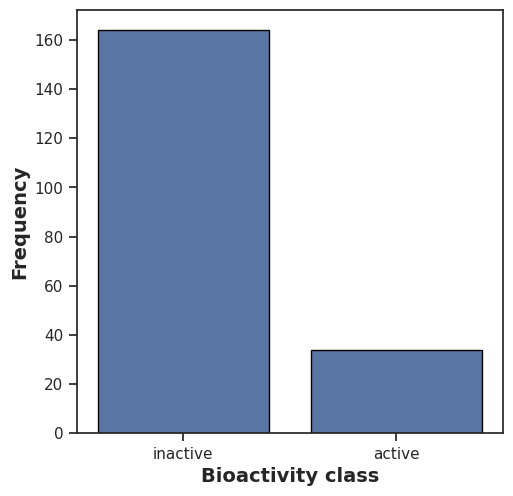

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

So now we're gonna make a scatter plot of the Molecular Weight (MW) versus LogP (*A negative value for logP means the compound has a higher affinity for the aqueous phase (it is more hydrophilic); when logP = 0 the compound is equally partitioned between the lipid and aqueous phases; a positive value for logP denotes a higher concentration in the lipid phase (i.e., the compound is more lipophilic).*) or the solubility of of the molecules and we're 1st going to start by defining the figure size to be "5.5 by 5.5" and we're going to use the scatter plot function here, whereby the "x" variable will be "MW" or Molecular Weight,and the "y" variable will be the LogP and the data will br df2_classs and hue (tonalidade) here would refer to the color, and so the color will be defdined on the basis of the "bioactivity_class" and because there are 2 classes we'll see that the color comprises of blue and orange, whereby blue will refer to the inactive molecule and orange will refer to the active molecule, and size of the data points here "pIC50" values and we define the "edgecolor" to be black, which is the edge of the circles and the "alpha" transparency is defined to be 0.7, and "x" label and "y" label are costum here "MW" and "LogP" with a font size of 14, and we have the "fontweight" to be "bold" and in this line [plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)], we're gonna define that we want the figure legend to be outside the plot, otherwise it will be embedded inside, which will make it very difficult to see, so we opted to have the figure legend outside and then finally we're gonna save it to the ".pdf" file, so let's run the block of code below:   

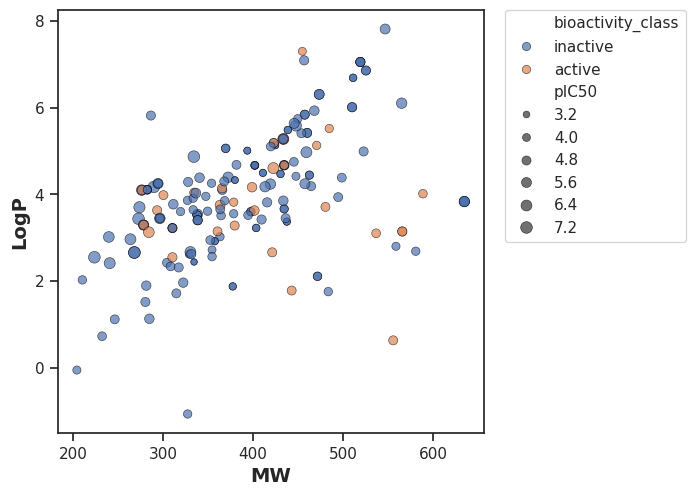

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

So let's do the same thing for the "pIC50" value, so the same concept applies, just changing the name of the variables, and so here we see the distribution of the inactive class and the active class:

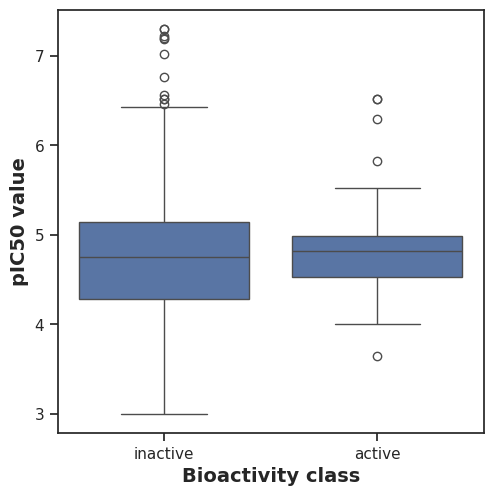

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

And so this is to be expected because we use the threshold (limiar) to define active and inactive, and so the threshold (limiar) that we used was 5 and 6.So if the "pIC50" value is greater than 6 it will be active and if the "pIC50" value is less then 5 it will be inactive **[NOTE THAT IN THIS STUDY THIS DOESN'T HAPPEN, BECAUSE WE HAVE TO REVIEW THE ORIGANL DATA FROM "bioactivity_data_preprocessed", WE HAVE MUCH MORE DATA THEN WHEN THIS EXERCISE /VIDEO WAS MADE]**
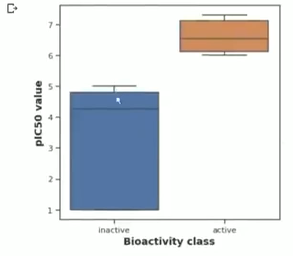
 and so we can see that the distribution  of the inactive is rather vast in comparison to the distribution of the active molecules which is between 6 and 7, whereas the inactive is between 1 and 5.

**Statistical analysis | Mann-Whitney U Test**

Now we're gonna to perform Mann-Whitney U Test, in order to look at the difference between the 2 bioactivity class, active and inactive and so we're gonna apply this "Mann-Whitney U Test" to teste the statistical significance of the difference whether they are different or not different and so the code for performing the "Mann-Whitney U Test"  was modified from "machineearningmastery.com" and w made it into a function. And so let's run it:

In [70]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

And now let's apply the "Mann-Whitney" function to the "pIC50" and what will do is, it's gonna compare the active class and the inactive class to see whether there is a statistical significance for the "pIC50" variable and so based on this analysis the "p" value is rather low [IN THE EXAMPLE OF THE VIDEO WHICH WE USED AS REFERENCE
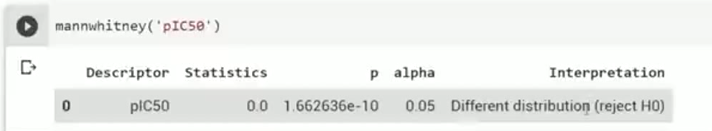
]
and therefore we reject the null hypothesis, and therefore we can say that it i having different distribution meaning that active and inactive, and so we're gonna apply the same plots and statistical analysis for the other 4 Lipinski desccriptors as well and so let's breeze through this: UNTIL THE SECTION
 **Interpretation of Statistical Results**.
So running for the 4 Lipinski descriptors (LogP, MW, NumHAcceptors, NumH Donors), the box plots and respectives "Mann-Whitney" functions.
Make note that all of the files, from the "Mann-Whitney" and the Box Plot are saved  as files so the Mann-Whitney has its own .csv file and the Box Plot has its own .pdf file and so we can download all of this at the end in order to use it, for own project and research.
AND NOW LET'S GO FOR THE  **SECTION "INTERPRETATION OF STATISTICAL RESULTS"** AT THE END OF THIS NOTEBOOK  

In [71]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3098.5,0.307868,0.05,Same distribution (fail to reject H0)


#### **MW**

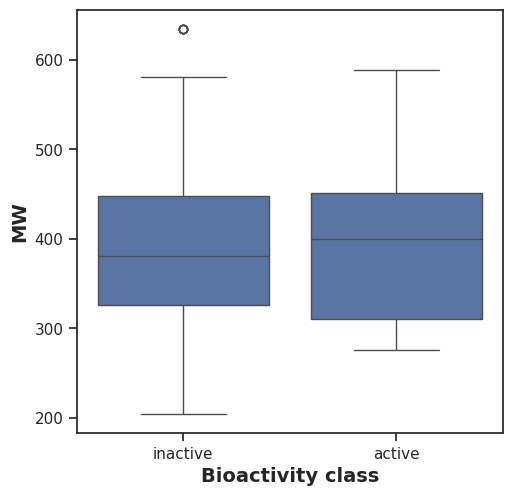

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [73]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2907.5,0.695532,0.05,Same distribution (fail to reject H0)


#### **LogP**

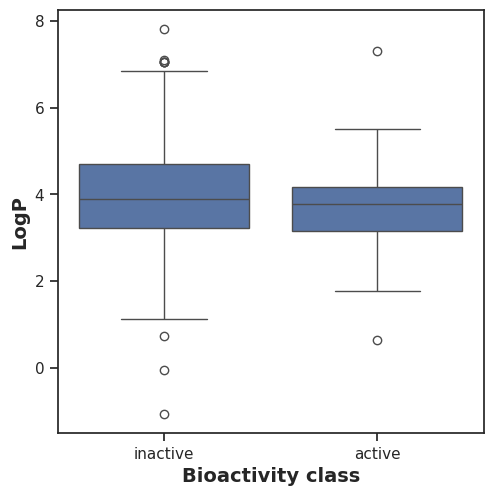

In [74]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [75]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2551.5,0.437666,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

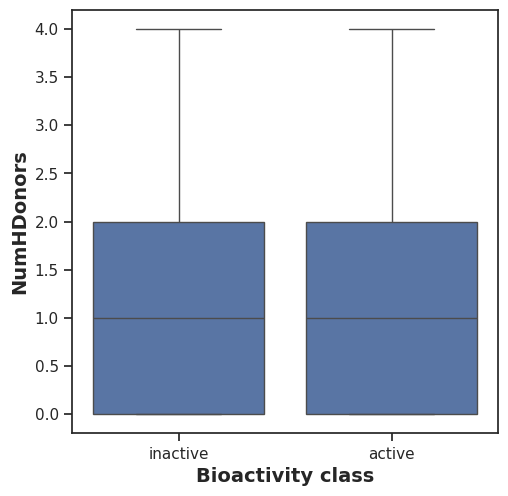

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [77]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2807.5,0.947593,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

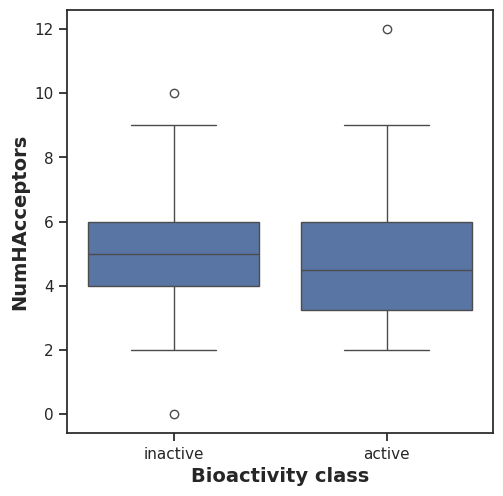

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [79]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2643.0,0.629723,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [80]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_ic50.pdf (deflated 38%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_MW.pdf (deflated 38%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: plot_MW_vs_LogP.pdf (deflated 11%)
updating: plot_bioactivity_class.pdf (deflated 37%)
updating: plot_LogP.pdf (deflated 38%)
updating: bioactivity_data_preprocessed.csv (deflated 81%)


END PART_2